In [7]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import ipyleaflet
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd
import dask
from dask.distributed import Client as daskClient

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
import xgboost as xgb

# Machine Learning
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Planetary Computer Tools
import pystac
import pystac_client
import odc
from pystac_client import Client
from pystac.extensions.eo import EOExtension as eo
from odc.stac import stac_load
import planetary_computer as pc
pc.settings.set_subscription_key('df2f4d7a411942f8a5b81d60cb9b95ca')

# Others
import requests
import rich.table
import math
import random
from itertools import cycle
from tqdm import tqdm
from time import sleep
tqdm.pandas()

In [8]:
# Getting data from CSV file
crop_presence_data = pd.read_csv("crop.csv")
crop_presence_data.head()

,Latitude and Longitude,Class of Land
0,"(10.323727047081501, 105.2516346045924)",Rice
1,"(10.322364360592521, 105.27843410554115)",Rice
2,"(10.321455902933202, 105.25254306225168)",Rice
3,"(10.324181275911162, 105.25118037576274)",Rice
4,"(10.324635504740822, 105.27389181724476)",Rice


# Data collection

In [9]:
#vegetative
indices_vegetative=pd.read_csv("vegetative.csv")
ndvi_vegetative=indices_vegetative[['NDVI']]
ndvi_vegetative.columns =['NDVI_veg']

evi_vegetative=indices_vegetative[['EVI']]
evi_vegetative.columns =['EVI_veg']

rgvi_vegetative=indices_vegetative[['RGVI']]
rgvi_vegetative.columns =['RGVI_veg']

ndvi_var_vegetative=indices_vegetative[['NDVI_var']]
ndvi_var_vegetative.columns =['NDVI_var_veg']

evi_var_vegetative=indices_vegetative[['EVI_var']]
evi_var_vegetative.columns =['EVI_var_veg']

rgvi_var_vegetative=indices_vegetative[['RGVI_var']]
rgvi_var_vegetative.columns =['RGVI_var_veg']


#vegetative_2
indices_vegetative_2=pd.read_csv("vegetative_2.csv")
ndvi_vegetative_2=indices_vegetative_2[['NDVI']]
ndvi_vegetative_2.columns =['NDVI_veg2']

evi_vegetative_2=indices_vegetative_2[['EVI']]
evi_vegetative_2.columns =['EVI_veg2']

rgvi_vegetative_2=indices_vegetative_2[['RGVI']]
rgvi_vegetative_2.columns =['RGVI_veg2']

ndvi_var_2 = indices_vegetative_2[['NDVI_var']]
ndvi_var_2.columns = ['NDVI_var_veg2']

evi_var_2 = indices_vegetative_2[['EVI_var']]
evi_var_2.columns = ['EVI_var_veg2']

rgvi_var_2 = indices_vegetative_2[['RGVI_var']]
rgvi_var_2.columns = ['RGVI_var_veg2']


In [10]:
#reproductive
indices_reproductive=pd.read_csv("reproductive.csv")
ndvi_reproductive=indices_reproductive[['NDVI']]
ndvi_reproductive.columns =['NDVI_rep']

evi_reproductive=indices_reproductive[['EVI']]
evi_reproductive.columns =['EVI_rep']

rgvi_reproductive=indices_reproductive[['RGVI']]
rgvi_reproductive.columns =['RGVI_rep']

ndvi_var_reproductive = indices_reproductive[['NDVI_var']]
ndvi_var_reproductive.columns = ['NDVI_var_rep']

evi_var_reproductive = indices_reproductive[['EVI_var']]
evi_var_reproductive.columns = ['EVI_var_rep']

rgvi_var_reproductive = indices_reproductive[['RGVI_var']]
rgvi_var_reproductive.columns = ['RGVI_var_rep']


# reproductive_2
indices_reproductive_2=pd.read_csv("reproductive_2.csv")
ndvi_reproductive_2=indices_reproductive_2[['NDVI']]
ndvi_reproductive_2.columns =['NDVI_rep2']

evi_reproductive_2=indices_reproductive_2[['EVI']]
evi_reproductive_2.columns =['EVI_rep2']

rgvi_reproductive_2=indices_reproductive_2[['RGVI']]
rgvi_reproductive_2.columns =['RGVI_rep2']

ndvi_var_reproductive_2 = indices_reproductive_2[['NDVI_var']]
ndvi_var_reproductive_2.columns = ['NDVI_var_rep_2']

evi_var_reproductive_2 = indices_reproductive_2[['EVI_var']]
evi_var_reproductive_2.columns = ['EVI_var_rep_2']

rgvi_var_reproductive_2 = indices_reproductive_2[['RGVI_var']]
rgvi_var_reproductive_2.columns = ['RGVI_var_rep_2']



In [11]:
# ripening
indices_ripening = pd.read_csv("ripening.csv")
ndvi_ripening = indices_ripening[['NDVI']]
ndvi_ripening.columns = ['NDVI_rip']

evi_ripening = indices_ripening[['EVI']]
evi_ripening.columns = ['EVI_rip']

rgvi_ripening = indices_ripening[['RGVI']]
rgvi_ripening.columns = ['RGVI_rip']
                         
ndvi_var_ripening = indices_ripening[['NDVI_var']]
ndvi_var_ripening.columns = ['NDVI_var_rip']

evi_var_ripening = indices_ripening[['EVI_var']]
evi_var_ripening.columns = ['EVI_var_rip']

rgvi_var_ripening = indices_ripening[['RGVI_var']]
rgvi_var_ripening.columns = ['RGVI_var_rip']


# ripening_2
indices_ripening_2 = pd.read_csv("ripening_2.csv")
ndvi_ripening_2 = indices_ripening_2[['NDVI']]
ndvi_ripening_2.columns = ['NDVI_rip2']

evi_ripening_2 = indices_ripening_2[['EVI']]
evi_ripening_2.columns = ['EVI_rip2']

rgvi_ripening_2 = indices_ripening_2[['RGVI']]
rgvi_ripening_2.columns = ['RGVI_rip2']

ndvi_var_ripening_2 = indices_ripening_2[['NDVI_var']]
ndvi_var_ripening_2.columns = ['NDVI_var_rip_2']

evi_var_ripening_2 = indices_ripening_2[['EVI_var']]
evi_var_ripening_2.columns = ['EVI_var_rip_2']

rgvi_var_ripening_2 = indices_ripening_2[['RGVI_var']]
rgvi_var_ripening_2.columns = ['RGVI_var_rip_2']



In [12]:
#concating all the indices into a single DataFrame
crop_data = pd.concat([
    ndvi_vegetative, evi_vegetative, rgvi_vegetative,
    ndvi_var_vegetative, evi_var_vegetative, rgvi_var_vegetative,
    ndvi_vegetative_2, evi_vegetative_2, rgvi_vegetative_2,
    ndvi_var_2, evi_var_2, rgvi_var_2, 
    ndvi_reproductive, evi_reproductive, rgvi_reproductive,
    ndvi_var_reproductive, evi_var_reproductive, rgvi_var_reproductive,
    ndvi_reproductive_2, evi_reproductive_2, rgvi_reproductive_2,
    ndvi_var_reproductive_2, evi_var_reproductive_2, rgvi_var_reproductive_2,
    ndvi_ripening, evi_ripening, rgvi_ripening,
    ndvi_var_ripening, evi_var_ripening, rgvi_var_ripening,
    ndvi_ripening_2, evi_ripening_2, rgvi_ripening_2,
    ndvi_var_ripening_2, evi_var_ripening_2, rgvi_var_ripening_2
], axis=1)


In [13]:
crop_data=pd.concat([crop_data,crop_presence_data['Class of Land']],axis=1)

In [239]:
crop_data.to_csv("indices with variances.csv")

In [14]:
crop_data

,NDVI_veg,EVI_veg,RGVI_veg,NDVI_var_veg,EVI_var_veg,RGVI_var_veg,NDVI_veg2,EVI_veg2,RGVI_veg2,NDVI_var_veg2,...,NDVI_var_rip,EVI_var_rip,RGVI_var_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDVI_var_rip_2,EVI_var_rip_2,RGVI_var_rip_2,Class of Land
0,0.422074,0.118437,1.068070,0.043044,0.004909,0.000812,0.167972,0.033225,1.019373,1.424671e-02,...,0.030897,0.005542,0.000216,0.092286,0.003993,1.028753,0.000595,0.000045,1.597330e-07,Rice
1,0.360787,0.102294,1.089308,0.022544,0.002618,0.000624,0.378719,0.080842,0.993149,2.464707e-02,...,0.040280,0.007883,0.000070,0.070908,0.004759,1.026593,0.000050,0.000020,1.940771e-06,Rice
2,0.370390,0.102235,1.078377,0.042899,0.003840,0.000552,0.203749,0.042147,1.005769,1.318285e-02,...,0.028652,0.005662,0.000060,0.226936,0.005013,1.016627,0.000000,0.000086,0.000000e+00,Rice
3,0.421787,0.127217,1.077879,0.057026,0.007039,0.001655,0.146944,0.027215,1.016223,1.303941e-02,...,0.032481,0.005794,0.000178,0.093788,0.001896,1.053283,0.000000,0.000012,0.000000e+00,Rice
4,0.234421,0.054358,1.119928,0.007976,0.000696,0.000966,0.206149,0.067763,0.999515,5.168289e-02,...,0.046734,0.005470,0.000019,0.130103,0.007449,1.038440,0.002680,0.000028,2.825280e-05,Rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.805688,0.335743,1.006032,0.000858,0.025769,0.000004,0.488007,0.019097,0.979280,3.851860e-33,...,0.000101,0.003267,0.000100,0.428861,0.072752,1.007580,0.008329,0.000533,8.415261e-06,Non Rice
596,0.772876,0.299192,1.012224,0.000595,0.017638,0.000015,0.559802,0.025692,0.997310,0.000000e+00,...,0.000101,0.002824,0.000073,0.428185,0.070864,0.997849,0.005851,0.000444,9.769075e-05,Non Rice
597,0.763383,0.291757,1.013963,0.000464,0.017216,0.000006,0.549541,0.024948,0.999243,0.000000e+00,...,0.000344,0.002940,0.000079,0.448632,0.074878,0.989211,0.005216,0.000467,2.963207e-04,Non Rice
598,0.830266,0.371834,1.006261,0.000796,0.030202,0.000002,0.582559,0.027712,0.996421,0.000000e+00,...,0.000297,0.004314,0.000069,0.476421,0.084578,0.993613,0.007762,0.000667,1.026748e-04,Non Rice


# Filling Null Values
During the filtering process, water locations were completely masked out resulting in null values of indices.
Hence adding back the index values of water for respective indices \
NDVI=-1 \
RGVI=0

In [15]:
crop_data.isnull().sum()

NDVI_veg          100
EVI_veg             0
RGVI_veg          100
NDVI_var_veg      100
EVI_var_veg         0
RGVI_var_veg      100
NDVI_veg2         100
EVI_veg2            0
RGVI_veg2         100
NDVI_var_veg2     100
EVI_var_veg2        0
RGVI_var_veg2     100
NDVI_rep           99
EVI_rep             0
RGVI_rep           99
NDVI_var_rep       99
EVI_var_rep         0
RGVI_var_rep       99
NDVI_rep2         100
EVI_rep2            0
RGVI_rep2         100
NDVI_var_rep_2    100
EVI_var_rep_2       0
RGVI_var_rep_2    100
NDVI_rip           99
EVI_rip             0
RGVI_rip           99
NDVI_var_rip       99
EVI_var_rip         0
RGVI_var_rip       99
NDVI_rip2         120
EVI_rip2            0
RGVI_rip2         120
NDVI_var_rip_2    120
EVI_var_rip_2       0
RGVI_var_rip_2    120
Class of Land       0
dtype: int64

In [16]:
#ndvi null values
crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']]=crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']].fillna(-1)

In [17]:
#rgvi null values
crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']]=crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']].fillna(0)

In [18]:
crop_data[['NDVI_var_veg', 
           'RGVI_var_veg', 
           'NDVI_var_veg2', 
           'RGVI_var_veg2', 
           'NDVI_var_rep', 
           'RGVI_var_rep', 
           'NDVI_var_rep_2', 
           'RGVI_var_rep_2', 
           'NDVI_var_rip', 
           'RGVI_var_rip', 
           'NDVI_var_rip_2', 
           'RGVI_var_rip_2']]=crop_data[['NDVI_var_veg', 
           'RGVI_var_veg', 
           'NDVI_var_veg2', 
           'RGVI_var_veg2', 
           'NDVI_var_rep', 
           'RGVI_var_rep', 
           'NDVI_var_rep_2', 
           'RGVI_var_rep_2', 
           'NDVI_var_rip', 
           'RGVI_var_rip', 
           'NDVI_var_rip_2', 
           'RGVI_var_rip_2']].fillna(0)


# MODEL Training

In [20]:

X = crop_data.drop(columns=['Class of Land'])
y = crop_data['Class of Land'].values
y = np.where(y == 'Rice', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=40)

In [21]:
X

,NDVI_veg,EVI_veg,RGVI_veg,NDVI_var_veg,EVI_var_veg,RGVI_var_veg,NDVI_veg2,EVI_veg2,RGVI_veg2,NDVI_var_veg2,...,RGVI_rip,NDVI_var_rip,EVI_var_rip,RGVI_var_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDVI_var_rip_2,EVI_var_rip_2,RGVI_var_rip_2
0,0.422074,0.118437,1.068070,0.043044,0.004909,0.000812,0.167972,0.033225,1.019373,1.424671e-02,...,1.022095,0.030897,0.005542,0.000216,0.092286,0.003993,1.028753,0.000595,0.000045,1.597330e-07
1,0.360787,0.102294,1.089308,0.022544,0.002618,0.000624,0.378719,0.080842,0.993149,2.464707e-02,...,1.023198,0.040280,0.007883,0.000070,0.070908,0.004759,1.026593,0.000050,0.000020,1.940771e-06
2,0.370390,0.102235,1.078377,0.042899,0.003840,0.000552,0.203749,0.042147,1.005769,1.318285e-02,...,1.019168,0.028652,0.005662,0.000060,0.226936,0.005013,1.016627,0.000000,0.000086,0.000000e+00
3,0.421787,0.127217,1.077879,0.057026,0.007039,0.001655,0.146944,0.027215,1.016223,1.303941e-02,...,1.020433,0.032481,0.005794,0.000178,0.093788,0.001896,1.053283,0.000000,0.000012,0.000000e+00
4,0.234421,0.054358,1.119928,0.007976,0.000696,0.000966,0.206149,0.067763,0.999515,5.168289e-02,...,1.007575,0.046734,0.005470,0.000019,0.130103,0.007449,1.038440,0.002680,0.000028,2.825280e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.805688,0.335743,1.006032,0.000858,0.025769,0.000004,0.488007,0.019097,0.979280,3.851860e-33,...,1.003185,0.000101,0.003267,0.000100,0.428861,0.072752,1.007580,0.008329,0.000533,8.415261e-06
596,0.772876,0.299192,1.012224,0.000595,0.017638,0.000015,0.559802,0.025692,0.997310,0.000000e+00,...,1.008121,0.000101,0.002824,0.000073,0.428185,0.070864,0.997849,0.005851,0.000444,9.769075e-05
597,0.763383,0.291757,1.013963,0.000464,0.017216,0.000006,0.549541,0.024948,0.999243,0.000000e+00,...,1.005195,0.000344,0.002940,0.000079,0.448632,0.074878,0.989211,0.005216,0.000467,2.963207e-04
598,0.830266,0.371834,1.006261,0.000796,0.030202,0.000002,0.582559,0.027712,0.996421,0.000000e+00,...,1.001743,0.000297,0.004314,0.000069,0.476421,0.084578,0.993613,0.007762,0.000667,1.026748e-04


In [48]:
#Feature Scaling
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Function for confusion matrix
def plot_confusion_matrix(true_value,predicted_value,title,labels):
    '''
    Plots a confusion matrix.
    Attributes:
    true_value - The ground truth value for comparision.
    predicted_value - The values predicted by the model.
    title - Title of the plot.
    labels - The x and y labels of the plot.
    '''
    cm = confusion_matrix(true_value,predicted_value)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    

# Logistic Regression

In [153]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [155]:
y_pred = model.predict(X_test)

In [156]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(classification_report(y_test, y_pred))

Accuracy 99.44%
              precision    recall  f1-score   support

    Non Rice       0.99      1.00      0.99        90
        Rice       1.00      0.99      0.99        90

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



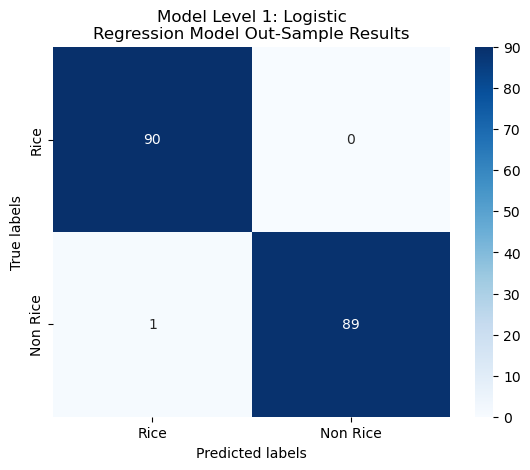

In [157]:
plot_confusion_matrix(y_test, y_pred,"Model Level 1: Logistic\nRegression Model Out-Sample Results",['Rice', 'Non Rice'])

# KNN model

In [186]:
from sklearn.neighbors import KNeighborsClassifier
model_2=KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train,y_train)

KNeighborsClassifier()

In [187]:
y_pred2=model_2.predict(X_test)

In [188]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy 98.89%
              precision    recall  f1-score   support

    Non Rice       0.99      0.99      0.99        90
        Rice       0.99      0.99      0.99        90

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



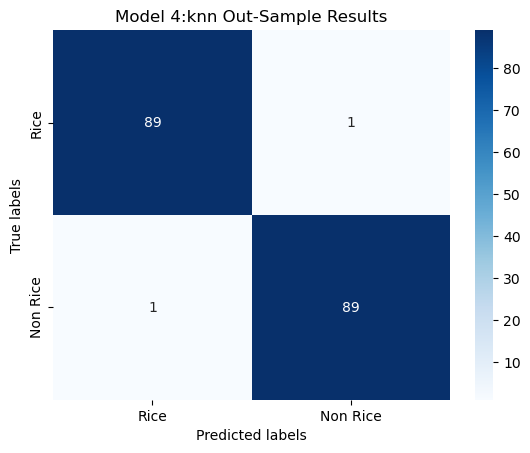

In [189]:
plot_confusion_matrix(y_test, y_pred2,"Model 4:knn Out-Sample Results",['Rice', 'Non Rice'])

# XGBOOST

In [23]:
#Hyperparater Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "subsample"        :[i/100.0 for i in range(75,90,5)],
 "reg_alpha"        :[0, 0.001, 0.005, 0.01, 0.05]
}

In [27]:
model_4 = xgb.XGBClassifier()


In [28]:
grid_search = GridSearchCV(estimator=model_4, param_grid=params, scoring='f1',n_jobs=-1,cv=5,verbose=1)


In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 57600 candidates, totalling 288000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7],
                         'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='f1', verbose=1)

In [30]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [62]:
best_params

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_alpha': 0.001,
 'subsample': 0.8}

In [32]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred4=best_model.predict(X_test)

In [34]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy 99.44%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.99      0.99        90

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



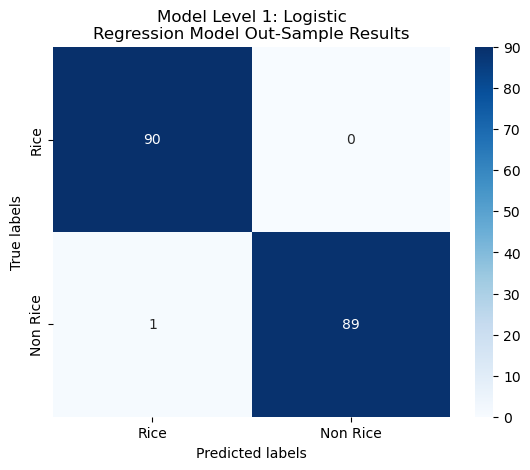

In [66]:
plot_confusion_matrix(y_test, y_pred4,"Model Level 1: Logistic\nRegression Model Out-Sample Results",['Rice', 'Non Rice'])

 # SUBMISSION 

In [67]:
# Showing submission file
submission_data = pd.read_csv("submission.csv")
submission_data

,Latitude and Longitude
0,"(10.18019073690894, 105.32022315786804)"
1,"(10.561107033461816, 105.12772097986661)"
2,"(10.623790611954897, 105.13771401411867)"
3,"(10.583364246115156, 105.23946127195805)"
4,"(10.20744446668854, 105.26844107128906)"
...,...
245,"(10.308283266873062, 105.50872812216863)"
246,"(10.582910017285496, 105.23991550078767)"
247,"(10.581547330796518, 105.23991550078767)"
248,"(10.629241357910818, 105.15315779432643)"


In [35]:
#vegetative
indices_vegetative=pd.read_csv("vegetative_test.csv")
ndvi_vegetative=indices_vegetative[['NDVI']]
ndvi_vegetative.columns =['NDVI_veg']

evi_vegetative=indices_vegetative[['EVI']]
evi_vegetative.columns =['EVI_veg']

rgvi_vegetative=indices_vegetative[['RGVI']]
rgvi_vegetative.columns =['RGVI_veg']

ndvi_var_vegetative=indices_vegetative[['NDVI_var']]
ndvi_var_vegetative.columns =['NDVI_var_veg']

evi_var_vegetative=indices_vegetative[['EVI_var']]
evi_var_vegetative.columns =['EVI_var_veg']

rgvi_var_vegetative=indices_vegetative[['RGVI_var']]
rgvi_var_vegetative.columns =['RGVI_var_veg']


#vegetative_2
indices_vegetative_2=pd.read_csv("vegetative_2_test.csv")
ndvi_vegetative_2=indices_vegetative_2[['NDVI']]
ndvi_vegetative_2.columns =['NDVI_veg2']

evi_vegetative_2=indices_vegetative_2[['EVI']]
evi_vegetative_2.columns =['EVI_veg2']

rgvi_vegetative_2=indices_vegetative_2[['RGVI']]
rgvi_vegetative_2.columns =['RGVI_veg2']

ndvi_var_2 = indices_vegetative_2[['NDVI_var']]
ndvi_var_2.columns = ['NDVI_var_veg2']

evi_var_2 = indices_vegetative_2[['EVI_var']]
evi_var_2.columns = ['EVI_var_veg2']

rgvi_var_2 = indices_vegetative_2[['RGVI_var']]
rgvi_var_2.columns = ['RGVI_var_veg2']


In [36]:
#reproductive
indices_reproductive=pd.read_csv("reproductive_test.csv")
ndvi_reproductive=indices_reproductive[['NDVI']]
ndvi_reproductive.columns =['NDVI_rep']

evi_reproductive=indices_reproductive[['EVI']]
evi_reproductive.columns =['EVI_rep']

rgvi_reproductive=indices_reproductive[['RGVI']]
rgvi_reproductive.columns =['RGVI_rep']

ndvi_var_reproductive = indices_reproductive[['NDVI_var']]
ndvi_var_reproductive.columns = ['NDVI_var_rep']

evi_var_reproductive = indices_reproductive[['EVI_var']]
evi_var_reproductive.columns = ['EVI_var_rep']

rgvi_var_reproductive = indices_reproductive[['RGVI_var']]
rgvi_var_reproductive.columns = ['RGVI_var_rep']


# reproductive_2
indices_reproductive_2=pd.read_csv("reproductive_2_test.csv")
ndvi_reproductive_2=indices_reproductive_2[['NDVI']]
ndvi_reproductive_2.columns =['NDVI_rep2']

evi_reproductive_2=indices_reproductive_2[['EVI']]
evi_reproductive_2.columns =['EVI_rep2']

rgvi_reproductive_2=indices_reproductive_2[['RGVI']]
rgvi_reproductive_2.columns =['RGVI_rep2']

ndvi_var_reproductive_2 = indices_reproductive_2[['NDVI_var']]
ndvi_var_reproductive_2.columns = ['NDVI_var_rep_2']

evi_var_reproductive_2 = indices_reproductive_2[['EVI_var']]
evi_var_reproductive_2.columns = ['EVI_var_rep_2']

rgvi_var_reproductive_2 = indices_reproductive_2[['RGVI_var']]
rgvi_var_reproductive_2.columns = ['RGVI_var_rep_2']



In [37]:
# ripening
indices_ripening = pd.read_csv("ripening_test.csv")
ndvi_ripening = indices_ripening[['NDVI']]
ndvi_ripening.columns = ['NDVI_rip']

evi_ripening = indices_ripening[['EVI']]
evi_ripening.columns = ['EVI_rip']

rgvi_ripening = indices_ripening[['RGVI']]
rgvi_ripening.columns = ['RGVI_rip']
                         
ndvi_var_ripening = indices_ripening[['NDVI_var']]
ndvi_var_ripening.columns = ['NDVI_var_rip']

evi_var_ripening = indices_ripening[['EVI_var']]
evi_var_ripening.columns = ['EVI_var_rip']

rgvi_var_ripening = indices_ripening[['RGVI_var']]
rgvi_var_ripening.columns = ['RGVI_var_rip']


# ripening_2
indices_ripening_2 = pd.read_csv("ripening_2_test.csv")
ndvi_ripening_2 = indices_ripening_2[['NDVI']]
ndvi_ripening_2.columns = ['NDVI_rip2']

evi_ripening_2 = indices_ripening_2[['EVI']]
evi_ripening_2.columns = ['EVI_rip2']

rgvi_ripening_2 = indices_ripening_2[['RGVI']]
rgvi_ripening_2.columns = ['RGVI_rip2']

ndvi_var_ripening_2 = indices_ripening_2[['NDVI_var']]
ndvi_var_ripening_2.columns = ['NDVI_var_rip_2']

evi_var_ripening_2 = indices_ripening_2[['EVI_var']]
evi_var_ripening_2.columns = ['EVI_var_rip_2']

rgvi_var_ripening_2 = indices_ripening_2[['RGVI_var']]
rgvi_var_ripening_2.columns = ['RGVI_var_rip_2']



In [38]:
crop_data = pd.concat([
    ndvi_vegetative, evi_vegetative, rgvi_vegetative,
    ndvi_var_vegetative, evi_var_vegetative, rgvi_var_vegetative,
    ndvi_vegetative_2, evi_vegetative_2, rgvi_vegetative_2,
    ndvi_var_2, evi_var_2, rgvi_var_2, 
    ndvi_reproductive, evi_reproductive, rgvi_reproductive,
    ndvi_var_reproductive, evi_var_reproductive, rgvi_var_reproductive,
    ndvi_reproductive_2, evi_reproductive_2, rgvi_reproductive_2,
    ndvi_var_reproductive_2, evi_var_reproductive_2, rgvi_var_reproductive_2,
    ndvi_ripening, evi_ripening, rgvi_ripening,
    ndvi_var_ripening, evi_var_ripening, rgvi_var_ripening,
    ndvi_ripening_2, evi_ripening_2, rgvi_ripening_2,
    ndvi_var_ripening_2, evi_var_ripening_2, rgvi_var_ripening_2
], axis=1)

In [39]:
crop_data

,NDVI_veg,EVI_veg,RGVI_veg,NDVI_var_veg,EVI_var_veg,RGVI_var_veg,NDVI_veg2,EVI_veg2,RGVI_veg2,NDVI_var_veg2,...,RGVI_rip,NDVI_var_rip,EVI_var_rip,RGVI_var_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDVI_var_rip_2,EVI_var_rip_2,RGVI_var_rip_2
0,0.046298,0.009429,1.281762,0.004002,0.000384,4.433696e-03,0.291337,0.044007,1.000532,0.016992,...,1.028319,0.017910,0.015675,2.594173e-04,0.185848,0.034425,1.020751,0.000911,0.000298,0.000816
1,0.087038,0.007857,1.215765,0.003384,0.000269,9.070599e-03,0.225286,0.065821,1.018434,0.033386,...,1.025549,0.039235,0.024550,3.920771e-04,0.250669,0.055137,1.041171,0.005631,0.001043,0.000010
2,0.127479,0.018057,0.996374,0.019912,0.001497,2.462912e-07,0.105576,0.018313,0.997917,0.009137,...,1.021878,0.028086,0.012501,1.061286e-04,0.250456,0.031972,1.044441,0.005530,0.000482,0.000072
3,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,...,0.989574,0.000000,0.000391,1.540744e-32,NaN,0.000000,NaN,NaN,0.000000,NaN
4,0.129472,0.095887,1.239213,0.048366,0.036407,2.358212e-02,0.571986,0.109466,0.991399,0.001338,...,1.026382,0.015859,0.001703,2.330873e-04,0.149280,0.041596,1.004861,0.015496,0.001915,0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
246,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,...,0.985825,0.000000,0.000294,1.540744e-32,NaN,0.000000,NaN,NaN,0.000000,NaN
247,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
248,0.341708,0.018872,1.020441,0.034218,0.002474,1.785585e-04,0.119527,0.025695,0.990997,0.022516,...,1.013062,0.047810,0.018209,9.060944e-05,0.220698,0.013349,1.053999,0.017479,0.000136,0.000139


In [83]:
crop_data.to_csv("test indices with variances.csv")

In [40]:
crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']]=crop_data[['NDVI_veg','NDVI_veg2','NDVI_rep','NDVI_rep2','NDVI_rip','NDVI_rip2']].fillna(-1)

In [41]:
crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']]=crop_data[['RGVI_veg','RGVI_veg2','RGVI_rep','RGVI_rep2','RGVI_rip','RGVI_rip2']].fillna(0)

In [42]:
crop_data[['NDVI_var_veg', 
           'RGVI_var_veg', 
           'NDVI_var_veg2', 
           'RGVI_var_veg2', 
           'NDVI_var_rep', 
           'RGVI_var_rep', 
           'NDVI_var_rep_2', 
           'RGVI_var_rep_2', 
           'NDVI_var_rip', 
           'RGVI_var_rip', 
           'NDVI_var_rip_2', 
           'RGVI_var_rip_2']]=crop_data[['NDVI_var_veg', 
           'RGVI_var_veg', 
           'NDVI_var_veg2', 
           'RGVI_var_veg2', 
           'NDVI_var_rep', 
           'RGVI_var_rep', 
           'NDVI_var_rep_2', 
           'RGVI_var_rep_2', 
           'NDVI_var_rip', 
           'RGVI_var_rip', 
           'NDVI_var_rip_2', 
           'RGVI_var_rip_2']].fillna(0)

In [76]:
X_submission=crop_data

In [77]:
X_submission

,NDVI_veg,EVI_veg,RGVI_veg,NDVI_var_veg,EVI_var_veg,RGVI_var_veg,NDVI_veg2,EVI_veg2,RGVI_veg2,NDVI_var_veg2,...,RGVI_rip,NDVI_var_rip,EVI_var_rip,RGVI_var_rip,NDVI_rip2,EVI_rip2,RGVI_rip2,NDVI_var_rip_2,EVI_var_rip_2,RGVI_var_rip_2
0,0.046298,0.009429,1.281762,0.004002,0.000384,4.433696e-03,0.291337,0.044007,1.000532,0.016992,...,1.028319,0.017910,0.015675,2.594173e-04,0.185848,0.034425,1.020751,0.000911,0.000298,0.000816
1,0.087038,0.007857,1.215765,0.003384,0.000269,9.070599e-03,0.225286,0.065821,1.018434,0.033386,...,1.025549,0.039235,0.024550,3.920771e-04,0.250669,0.055137,1.041171,0.005631,0.001043,0.000010
2,0.127479,0.018057,0.996374,0.019912,0.001497,2.462912e-07,0.105576,0.018313,0.997917,0.009137,...,1.021878,0.028086,0.012501,1.061286e-04,0.250456,0.031972,1.044441,0.005530,0.000482,0.000072
3,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.989574,0.000000,0.000391,1.540744e-32,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.129472,0.095887,1.239213,0.048366,0.036407,2.358212e-02,0.571986,0.109466,0.991399,0.001338,...,1.026382,0.015859,0.001703,2.330873e-04,0.149280,0.041596,1.004861,0.015496,0.001915,0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
246,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.985825,0.000000,0.000294,1.540744e-32,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
247,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
248,0.341708,0.018872,1.020441,0.034218,0.002474,1.785585e-04,0.119527,0.025695,0.990997,0.022516,...,1.013062,0.047810,0.018209,9.060944e-05,0.220698,0.013349,1.053999,0.017479,0.000136,0.000139


In [78]:
X_submission = sc.fit_transform(X_submission)


In [79]:
y_submission=best_model.predict(X_submission)

In [80]:
y_submission

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0])

In [81]:
y_submission= np.where(y_submission == 1,'Rice','Non Rice')

In [82]:
y_submission=pd.DataFrame(y_submission)
y_submission.columns=["Prediction"]
y_submission=pd.concat([submission_data,y_submission], axis=1)

# Final predictions


In [83]:
y_submission

,Latitude and Longitude,Prediction
0,"(10.18019073690894, 105.32022315786804)",Rice
1,"(10.561107033461816, 105.12772097986661)",Rice
2,"(10.623790611954897, 105.13771401411867)",Rice
3,"(10.583364246115156, 105.23946127195805)",Non Rice
4,"(10.20744446668854, 105.26844107128906)",Rice
...,...,...
245,"(10.308283266873062, 105.50872812216863)",Non Rice
246,"(10.582910017285496, 105.23991550078767)",Non Rice
247,"(10.581547330796518, 105.23991550078767)",Non Rice
248,"(10.629241357910818, 105.15315779432643)",Rice


In [93]:
y_submission.to_csv("Our prediction.csv")

In [86]:
ref=pd.read_csv("reference prediction.csv")

In [90]:
#compares values row by row
#True if values are same
#False if not
compare=y_submission.Prediction==ref.target

In [91]:
#returns total true values
compare.sum()

214

In [ ]:
# with ndwi removed
crop_data = pd.concat([
    ndvi_vegetative, evi_vegetative, rgvi_vegetative, ndbi_vegetative, dvi_vegetative, ipvi_vegetative, msavi_vegetative,
    ndvi_vegetative_2, evi_vegetative_2, rgvi_vegetative_2, ndbi_vegetative_2, dvi_vegetative_2, ipvi_vegetative_2, msavi_vegetative_2,
    ndvi_reproductive, evi_reproductive, rgvi_reproductive, ndbi_reproductive, dvi_reproductive, ipvi_reproductive, msavi_reproductive,
    ndvi_reproductive_2, evi_reproductive_2, rgvi_reproductive_2, ndbi_reproductive_2, dvi_reproductive_2, ipvi_reproductive_2, msavi_reproductive_2,
    ndvi_ripening, evi_ripening, rgvi_ripening, ndbi_ripening, dvi_ripening, ipvi_ripening, msavi_ripening,
    ndvi_ripening_2, evi_ripening_2, rgvi_ripening_2, ndbi_ripening_2, dvi_ripening_2, ipvi_ripening_2, msavi_ripening_2
], axis=1)


In [ ]:
#crop_data=pd.concat([ndvi_vegetative,evi_vegetative,rgvi_vegetative,ndvi_vegetative_2,evi_vegetative_2,rgvi_vegetative_2,ndvi_reproductive,evi_reproductive,rgvi_reproductive,ndvi_reproductive_2,evi_reproductive_2,rgvi_reproductive_2,ndvi_ripening,evi_ripening,rgvi_ripening,ndvi_ripening_2,evi_ripening_2,rgvi_ripening_2],axis=1)